In [1]:
%matplotlib inline
import torch
from d2l import torch as d2l

ReLU函数<br>
最受欢迎的激活函数是修正线性单元（Rectified linear unit，ReLU），因为它实现简单，同时在各种预测任务<br>
中表现良好。ReLU提供了⼀种⾮常简单的⾮线性变换。给定元素x，ReLU函数被定义为该元素与0的最⼤值：<br>
$$ReLU(x) = max(x, 0)$$
通俗地说，ReLU函数通过将相应的活性值设为0，仅保留正元素并丢弃所有负元素。为了直观感受⼀下，我     
们可以画出函数的曲线图。正如从图中所看到，激活函数是分段线性的。

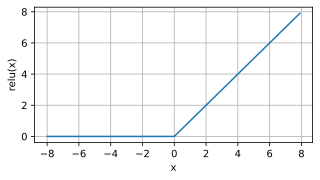

In [2]:
x = torch.arange(-8.0, 8.0, 0.1, requires_grad=True) 
y = torch.relu(x)
d2l.plot(x.detach(), y.detach(), 'x', 'relu(x)', figsize=(5, 2.5))

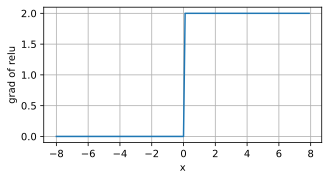

In [5]:
# 绘制ReLU函数的导数
y.backward(torch.ones_like(x), retain_graph=True)
d2l.plot(x.detach(), x.grad, 'x', 'grad of relu', figsize=(5, 2.5))

sigmoid函数   
对于⼀个定义域在R中的输⼊，sigmoid函数将输⼊变换为区间(0, 1)上的输出。因此，sigmoid通常称为挤压函数（squashing function）：它将范围（-inf, inf）中的任意输⼊压缩到区间（0, 1）中的某个值：   
$$sigmoid(x) = \frac{1}{1 + exp(−x)}$$

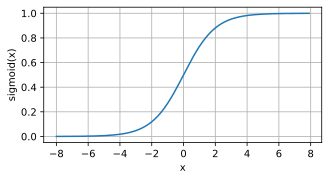

In [6]:
y = torch.sigmoid(x)
d2l.plot(x.detach(), y.detach(), 'x', 'sigmoid(x)', figsize=(5, 2.5))

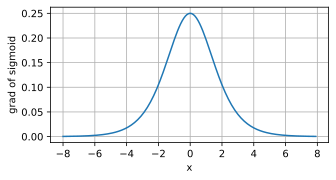

In [7]:
# 求sigmoid的导数
x.grad.data.zero_()
y.backward(torch.ones_like(x),retain_graph=True)
d2l.plot(x.detach(), x.grad, 'x', 'grad of sigmoid', figsize=(5, 2.5))

tanh函数    
与sigmoid函数类似，tanh(双曲正切)函数也能将其输⼊压缩转换到区间(-1, 1)上。tanh函数的公式如下：
$$tanh(x) = \frac{1 − exp(−2x)}{1 + exp(−2x)}$$

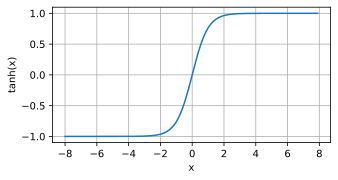

In [9]:
y = torch.tanh(x)
d2l.plot(x.detach(), y.detach(), 'x', 'tanh(x)', figsize=(5, 2.5))

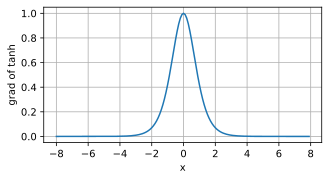

In [10]:
# 求tanh导数
# 清除以前的梯度
x.grad.zero_()
y.backward(torch.ones_like(x),retain_graph=True)
d2l.plot(x.detach(), x.grad, 'x', 'grad of tanh', figsize=(5, 2.5))

⼩结    
• 多层感知机在输出层和输⼊层之间增加⼀个或多个全连接隐藏层，并通过激活函数转换隐藏层的输出。    
• 常⽤的激活函数包括ReLU函数、sigmoid函数和tanh函数。

练习
1. 计算pReLU激活函数的导数。
2. 证明⼀个仅使⽤ReLU（或pReLU）的多层感知机构造了⼀个连续的分段线性函数。
3. 证明tanh(x) + 1 = 2 sigmoid(2x)。
4. 假设我们有⼀个⾮线性单元，将它⼀次应⽤于⼀个小批量的数据。你认为这会导致什么样的问题？

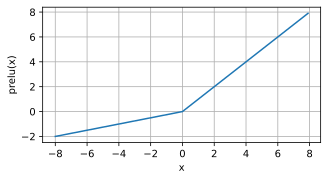

In [31]:
#1.
m = torch.nn.PReLU()#a默认0.25
y = m(x)
d2l.plot(x.detach(), y.detach(), 'x', 'prelu(x)', figsize=(5, 2.5))
#解法二
#a=0.25
#print(torch.max(input,torch.FloatTensor([0.0]))  + a * torch.min(input,torch.FloatTensor([0.0])))

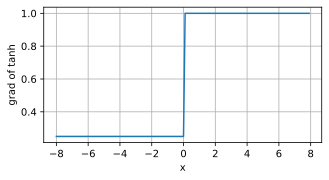

In [32]:
#1.
x.grad.zero_()
y.backward(torch.ones_like(x),retain_graph=True)
d2l.plot(x.detach(), x.grad, 'x', 'grad of tanh', figsize=(5, 2.5))

2. 
对于第二题，我是这样想的。绘制出RELU(x)的图像后，我们可以发现，如果输出值经过下一层隐藏层的计算，如果＜0则这个数据被舍弃。相当于一个状态在某一层中会被筛选，而被筛选的条件由下一层隐藏层决定，然而这个状态是连续的，因此就会产生类似于分段的效果。

In [39]:
#3.数学公式证明显而易见
z = torch.tensor([1.0,1.5,2.], dtype=float)
b = torch.tanh(z)+1.0
c = 2.0*torch.sigmoid(2.0*z)
b,c

(tensor([1.7616, 1.9051, 1.9640], dtype=torch.float64),
 tensor([1.7616, 1.9051, 1.9640], dtype=torch.float64))

4. 
本人猜测是欠拟合